In [1]:
#XGBOOST==>Extreme Gradient Boosting

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
install.packages("data.table") 
install.packages("dplyr") 
install.packages("ggplot2") 
install.packages("caret") 
install.packages("xgboost") 
install.packages("e1071") 
install.packages("cowplot") 
install.packages("matrix")
install.packages("magrittr")
install.packages("glmnet", dependencies=TRUE)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5301817 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [5]:
%%R
library(data.table) 
library(dplyr)      
library(ggplot2)  
library(caret)     
library(xgboost)    
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)

R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:data.table’:

    between, first, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: lattice

R[write to console]: 
Attaching package: ‘xgboost’


R[write to console]: The following object is masked from ‘package:dplyr’:

    slice


R[write to console]: Loaded glmnet 4.1-3



In [6]:
%%R
data = read.csv('/content/gdrive/My Drive/DS_CP/diabetes.csv')

In [7]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [8]:
%%R
dim(data)

[1] 768   9


In [9]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [10]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [11]:
%%R
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [12]:
%%R
set.seed(123)   # set seed - same random numbers generated
train_ind = sample(seq_len(nrow(data)),size = 538) 
train =data[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=data[-train_ind,]  
head(test)

   Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1            6     148            72            35       0 33.6
3            8     183            64             0       0 23.3
4            1      89            66            23      94 28.1
9            2     197            70            45     543 30.5
15           5     166            72            19     175 25.8
17           0     118            84            47     230 45.8
   DiabetesPedigreeFunction Age Outcome
1                     0.627  50       1
3                     0.672  32       1
4                     0.167  21       0
9                     0.158  53       1
15                    0.587  51       1
17                    0.551  31       1


In [13]:
%%R
sparse_matrix <- sparse.model.matrix(Outcome ~ ., data = train)[,-1]
head(sparse_matrix)

6 x 8 sparse Matrix of class "dgCMatrix"
    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
415           .     138            60            35     167 34.6
463           8      74            70            40      49 35.3
179           5     143            78             .       . 45.0
526           3      87            60            18       . 21.8
195           8      85            55            20       . 24.4
118           5      78            48             .       . 33.7
    DiabetesPedigreeFunction Age
415                    0.534  21
463                    0.705  39
179                    0.190  47
526                    0.444  21
195                    0.136  42
118                    0.654  25


In [14]:
%%R
y_train<-train$Outcome
head(y_train)

[1] 1 0 0 0 0 0


In [15]:
%%R
bst <- xgboost(data = sparse_matrix, label = y_train, max_depth = 8, eta = 1, nthread = 2,nrounds = 15, objective = "binary:logistic")

[10:34:24] WARNING: amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.364356 
[2]	train-logloss:0.238075 
[3]	train-logloss:0.167856 
[4]	train-logloss:0.139798 
[5]	train-logloss:0.117535 
[6]	train-logloss:0.093523 
[7]	train-logloss:0.078348 
[8]	train-logloss:0.067911 
[9]	train-logloss:0.059493 
[10]	train-logloss:0.052755 
[11]	train-logloss:0.048460 
[12]	train-logloss:0.044454 
[13]	train-logloss:0.042060 
[14]	train-logloss:0.039047 
[15]	train-logloss:0.036606 


In [16]:
%%R
importanceRaw <- xgb.importance(feature_names = colnames(sparse_matrix), model = bst, data = sparse_matrix, label = y_train)
importanceClean <- importanceRaw[,`:=`(Cover=NULL, Frequency=NULL)]

head(importanceClean)

                    Feature       Gain
1:                  Glucose 0.35017559
2:                      BMI 0.15411405
3: DiabetesPedigreeFunction 0.11805660
4:                      Age 0.11508924
5:            BloodPressure 0.08404992
6:            SkinThickness 0.06825936


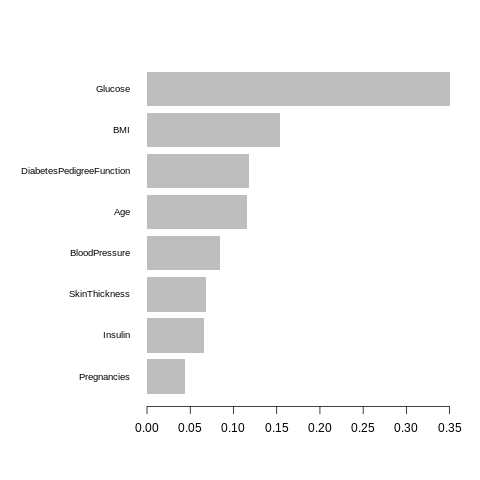

In [19]:
%%R
xgb.plot.importance(importance_matrix = importanceRaw)

In [20]:
%%R
y_test<-test$Outcome
test_n <- sparse.model.matrix(Outcome ~ ., data = test)[,-1]
head(test_n)


6 x 8 sparse Matrix of class "dgCMatrix"
   Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1            6     148            72            35       . 33.6
3            8     183            64             .       . 23.3
4            1      89            66            23      94 28.1
9            2     197            70            45     543 30.5
15           5     166            72            19     175 25.8
17           .     118            84            47     230 45.8
   DiabetesPedigreeFunction Age
1                     0.627  50
3                     0.672  32
4                     0.167  21
9                     0.158  53
15                    0.587  51
17                    0.551  31


In [21]:
%%R
pred <- predict(bst, test_n)
# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))
accuracy = 1-err
print(paste("Accuracy of XGBoost model is:",accuracy))

[1] "test-error= 0.256521739130435"
[1] "Accuracy of XGBoost model is: 0.743478260869565"
